(327, 2)
[[17.04727599 15.08858368]
 [18.02121343 15.84950415]
 [12.92647003 16.10429727]
 [17.38405634 14.89365307]
 [19.08050091 12.65766712]]


<ipython-input-2-b5113721cd12>:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=25, edgecolors='k', cmap='coolwarm', alpha=0.6)


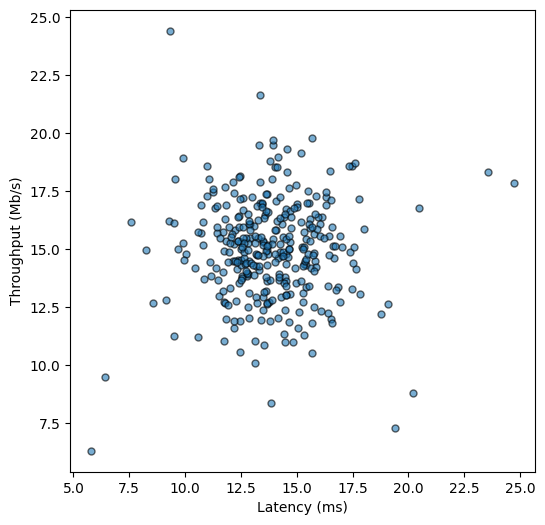

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a dataset with outliers
def generate_dataset_with_outliers(num_samples, num_outliers):
    # Generate random data for latency and throughput
    latency = np.random.normal(loc=14, scale=2, size=num_samples)
    throughput = np.random.normal(loc=15, scale=2, size=num_samples)

    # Add random outliers
    outlier_latency = np.random.uniform(low=5, high=25, size=num_outliers)
    outlier_throughput = np.random.uniform(low=5, high=25, size=num_outliers)

    # Combine normal data and outliers
    dataset = np.column_stack((latency, throughput))
    outliers = np.column_stack((outlier_latency, outlier_throughput))
    dataset = np.vstack((dataset, outliers))

    return dataset

# Generate the dataset with outliers
X = generate_dataset_with_outliers(307, 20)

# Print the shape and first few samples of the dataset
print(X.shape)
print(X[:5])

# Plot the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=25, edgecolors='k', cmap='coolwarm', alpha=0.6)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (Mb/s)')
plt.show()


Anomaly detection using a bi-variate normal distribution involves modeling the underlying distribution of the data based on two features or dimensions. In this method, we assume that the normal data follows a normal distribution in the feature space.

Here's how it works:

Estimate Mean and Covariance: The first step is to estimate the mean and covariance matrix of the normal distribution from the given dataset. The mean represents the central tendency of the data, and the covariance matrix captures the relationships between the different features.

Modeling Normal Data: Once we have the mean and covariance, we can construct a multivariate normal distribution that represents the normal behavior of the data.

Anomaly Detection: After modeling the normal data distribution, we can calculate the probability density function (PDF) of each data point. Points with low probability density (i.e., below a certain threshold) are considered anomalies or outliers.

Thresholding(epsilon): Based on the calculated PDF values, we can set a threshold to identify anomalies. Data points with PDF values below this threshold are flagged as anomalies.

Detection: Finally, we can identify and label the anomalies in the dataset based on the threshold.

In Python, estimating the mean and covariance matrix and modeling the normal data distribution is straightforward using libraries like NumPy. The mean() and cov() functions in NumPy allow us to compute the mean and covariance matrix, respectively, from the given dataset.

The covariance matrix is a square matrix that summarizes the pairwise covariance between different features or variables in a dataset. It provides valuable insights into the relationships and interactions between variables. Here's an explanation of the values in the covariance matrix:

Diagonal Elements: The **diagonal elements of the covariance matrix** represent the **variances** of individual variables. A **larger value** indicates **higher** **variance**, meaning the data points are more spread out along that variable's axis. Mathematically, the diagonal elements correspond to the covariance of each variable with itself, which is simply the variance of that variable.

Off-Diagonal Elements: The **off-diagonal elements** of the covariance matrix **represent the covariances** between pairs of variables. Covariance measures how two variables change together. A **positive covariance** indicates that the **variables tend to increase or decrease together**, while a negative covariance indicates that one variable tends to increase when the other decreases, and vice versa.

Symmetry: The covariance matrix is symmetric, meaning the covariance between variables i and j is the same as the covariance between variables j and i. This symmetry arises from the definition of covariance as a measure of the relationship between two variables, regardless of their order.

Units: The units of measurement for the covariance matrix depend on the units of the variables involved. If the variables are in the same units, then the covariance is in those units squared. If the variables are in different units, the covariance is a mix of the units of the variables.

Normalization: The covariance matrix can be normalized to remove the effect of the scales of the variables. This is often done by dividing each element by the product of the standard deviations of the two variables involved, resulting in values between -1 and 1. This normalized covariance is called the correlation coefficient, and it measures the strength and direction of the linear relationship between variables.

In summary, the covariance matrix provides a comprehensive summary of the relationships between variables in a dataset, capturing both the variances of individual variables and the covariances between pairs of variables. It is a fundamental tool in statistics and data analysis for understanding the structure and patterns in multivariate data.

In [3]:

# Calculate mean and covariance matrix
mu = np.mean(X, axis=0)
Sigma = np.cov(X.T)

print('mu =\n', mu)
print('Sigma =\n', Sigma)

# 4.79066055 and 5.05925746 are variance in different directions

mu =
 [13.80791194 14.97141123]
Sigma =
 [[5.05925746 0.15166677]
 [0.15166677 4.79066055]]


In [4]:
from scipy.stats import multivariate_normal

# Calculate the probability of observing each data point in the training data
p = multivariate_normal(mean=mu, cov=Sigma).pdf(X)

# Print the shape and probabilities for the first 10 data points
print('Shape of probabilities:', p.shape)
print('Probabilities for the first 10 data points:', p[:10])


Shape of probabilities: (327,)
Probabilities for the first 10 data points: [0.01146512 0.00527493 0.0260292  0.009106   0.0010949  0.00388386
 0.02134422 0.02973278 0.00149977 0.02099111]


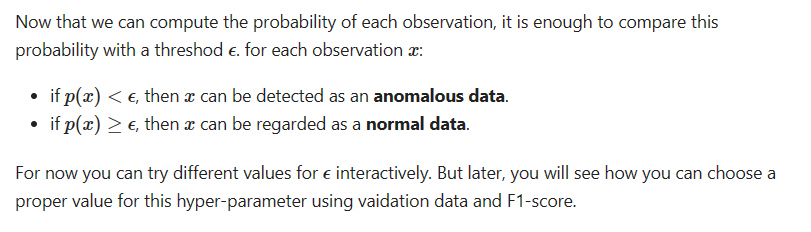

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import ipywidgets as widgets

# Generate meshgrid for contour plot
x1 = np.linspace(4, 25, 200)
x2 = np.linspace(4, 25, 200)
X1, X2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

def update_epsilon(eps):
    ax.clear()

    # Plot normal and anomalous data
    p = multivariate_normal(mean=mu, cov=Sigma).pdf(X)
    normal = X[p >= eps]
    outlier = X[p < eps]
    ax.scatter(normal[:, 0], normal[:, 1], s=25, marker='o', c='b', edgecolors='k', cmap='coolwarm', alpha=0.6)
    ax.scatter(outlier[:, 0], outlier[:, 1], s=50, marker='x', c='r', edgecolors='k', cmap='coolwarm')

    # Plot contour related to epsilon
    p = multivariate_normal(mean=mu, cov=Sigma).pdf(np.c_[X1.ravel(), X2.ravel()])
    p = p.reshape(X1.shape)
    ax.contour(X1, X2, p, levels=[eps])

    ax.set_title("$\epsilon$ = 10^{}".format(np.log10(eps)))
    plt.xlabel('Latency (ms)')
    plt.ylabel('Throughput (Mb/s)')
    plt.show()

eps = widgets.FloatLogSlider(value=1e-3, base=10, min=-10, max=-1, step=1, description='epsilon')

widgets.interact(update_epsilon, eps=eps)


interactive(children=(FloatLogSlider(value=0.001, description='epsilon', max=-1.0, min=-10.0, step=1.0), Outpu…

<function __main__.update_epsilon(eps)>

<ipython-input-6-ed5f9673c2ea>:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(normal[:, 0], normal[:, 1], s=25, marker='o', c='b', edgecolors='k', alpha=0.6, cmap='coolwarm')
<ipython-input-6-ed5f9673c2ea>:27: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(outlier[:, 0], outlier[:, 1], s=50, marker='x', c='r', edgecolors='k', cmap='coolwarm')
<ipython-input-6-ed5f9673c2ea>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(outlier[:, 0], outlier[:, 1], s=50, marker='x', c='r', edgecolors='k', cmap='coolwarm')


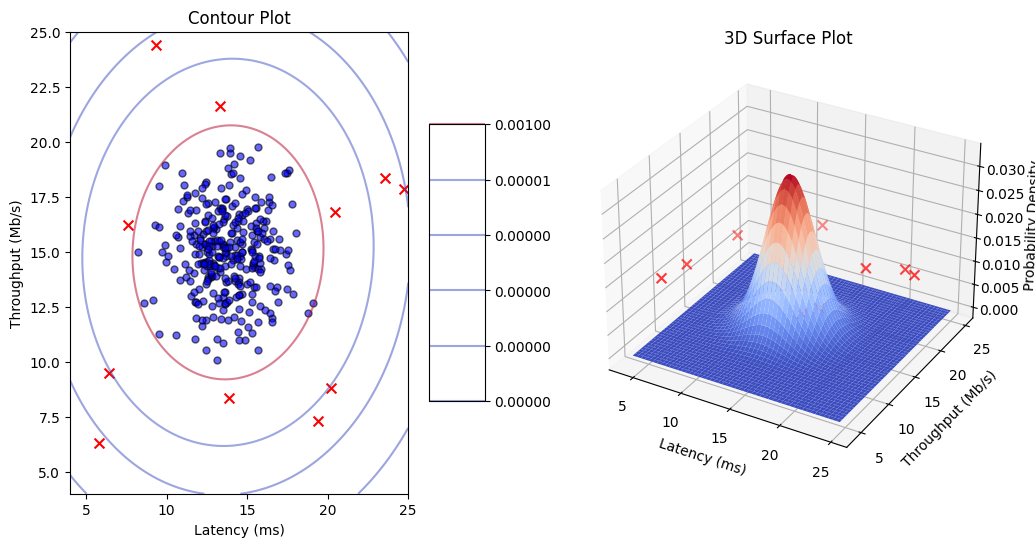

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generate meshgrid for contour plot
x1 = np.linspace(4, 25, 200)
x2 = np.linspace(4, 25, 200)
X1, X2 = np.meshgrid(x1, x2)

# Calculate probabilities and separate normal and outlier data
p = multivariate_normal(mean=mu, cov=Sigma).pdf(X)
normal = X[p >= 0.001]
outlier = X[p < 0.001]

# Calculate probabilities for contour plot
p_contour = multivariate_normal(mean=mu, cov=Sigma).pdf(np.c_[X1.ravel(), X2.ravel()])
p_contour = p_contour.reshape(X1.shape)

# Plotting
fig = plt.figure(figsize=(12, 6))

# Contour plot
ax1 = fig.add_subplot(121)
levels = [1e-20, 1e-15, 1e-10, 1e-7, 1e-5, 1e-3]
contour = ax1.contour(X1, X2, p_contour, levels, cmap='coolwarm', alpha=0.5)
ax1.scatter(normal[:, 0], normal[:, 1], s=25, marker='o', c='b', edgecolors='k', alpha=0.6, cmap='coolwarm')
ax1.scatter(outlier[:, 0], outlier[:, 1], s=50, marker='x', c='r', edgecolors='k', cmap='coolwarm')
ax1.set_xlabel('Latency (ms)')
ax1.set_ylabel('Throughput (Mb/s)')
ax1.set_title('Contour Plot')

# 3D Surface plot
ax2 = fig.add_subplot(122, projection='3d')
surface = ax2.plot_surface(X1, X2, p_contour, cmap='coolwarm')
ax2.scatter3D(outlier[:, 0], outlier[:, 1], 0.015, s=50, marker='x', c='r')
ax2.set_xlabel('Latency (ms)')
ax2.set_ylabel('Throughput (Mb/s)')
ax2.set_zlabel('Probability Density')
ax2.set_title('3D Surface Plot')

# Color bar for contour plot
fig.colorbar(contour, ax=ax1, shrink=0.6, aspect=5)

plt.show()


# Choosing epsilon

<ipython-input-8-ef155c4f5bb5>:9: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[p < EPSILON, 0], X[p < EPSILON, 1], s=50, marker='x', c='r', edgecolors='k')
<ipython-input-8-ef155c4f5bb5>:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[p < EPSILON, 0], X[p < EPSILON, 1], s=50, marker='x', c='r', edgecolors='k')
<ipython-input-8-ef155c4f5bb5>:23: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[p < EPSILON, 0], X[p < EPSILON, 1], s=50, marker='x', c='r', edgecolors='k')


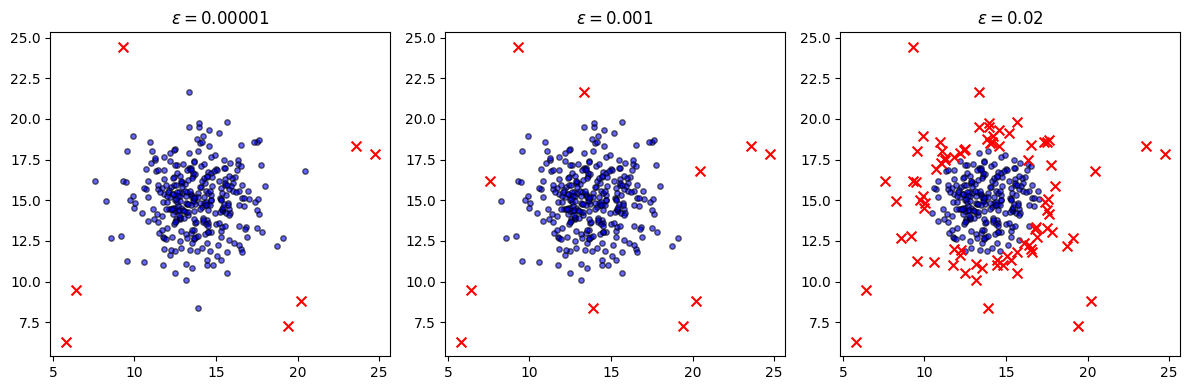

In [8]:

p = multivariate_normal(mean=mu, cov=Sigma).pdf(X)

plt.figure(figsize=(12, 4))

# Plot for epsilon = 0.00001
plt.subplot(131)
EPSILON = 1e-5
plt.scatter(X[p >= EPSILON, 0], X[p >= EPSILON, 1], s=15, marker='o', c='b', edgecolors='k', alpha=0.6)
plt.scatter(X[p < EPSILON, 0], X[p < EPSILON, 1], s=50, marker='x', c='r', edgecolors='k')
plt.title('$\epsilon=0.00001$')

# Plot for epsilon = 0.001
plt.subplot(132)
EPSILON = 1e-3
plt.scatter(X[p >= EPSILON, 0], X[p >= EPSILON, 1], s=15, marker='o', c='b', edgecolors='k', alpha=0.6)
plt.scatter(X[p < EPSILON, 0], X[p < EPSILON, 1], s=50, marker='x', c='r', edgecolors='k')
plt.title('$\epsilon=0.001$')

# Plot for epsilon = 0.02
plt.subplot(133)
EPSILON = 1e-2
plt.scatter(X[p >= EPSILON, 0], X[p >= EPSILON, 1], s=15, marker='o', c='b', edgecolors='k', alpha=0.6)
plt.scatter(X[p < EPSILON, 0], X[p < EPSILON, 1], s=50, marker='x', c='r', edgecolors='k')
plt.title('$\epsilon=0.02$')

plt.tight_layout()
plt.show()


# choose the value of epsilon ($\epsilon$) that maximizes the F1-score on the validation data

 you can follow these steps:

- Split your dataset into training and validation sets.
- Train your anomaly detection model using the training set.
- Use different values of epsilon to predict outliers on the validation set.
- Compute the F1-score for each value of epsilon.
- **Choose the epsilon value that maximizes the F1-score**.

Since we **don't have separate training and validation sets** in this  code, we'll use the entire dataset X for both training and validation.

then We'll compute the F1-score for different epsilon values using the entire dataset X.

but you have to seperate and split dataset to training test and validation in real example

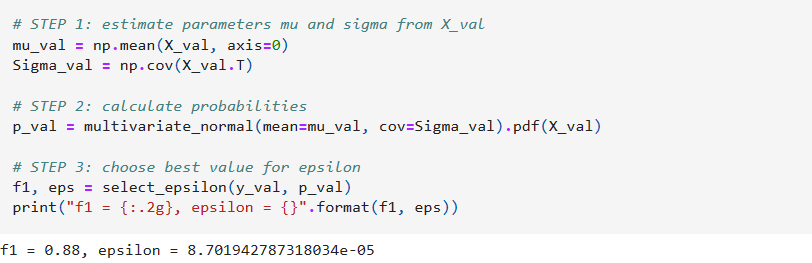

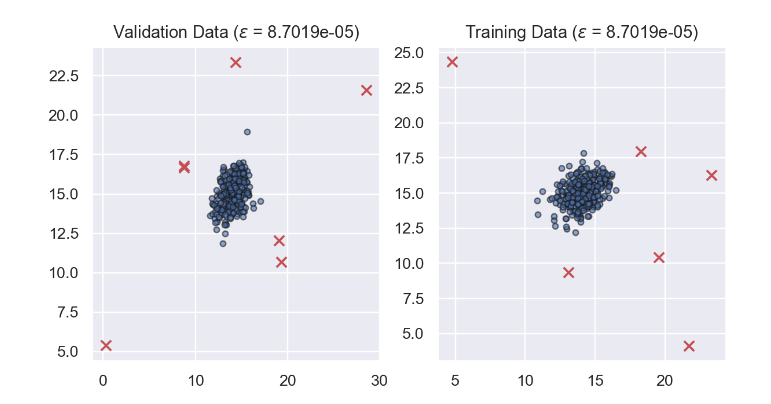

in next example if we consider about normal guessian distribution we can not detect anomaly (grean point) but if we consider about correlation we can detect green point as anomaly.

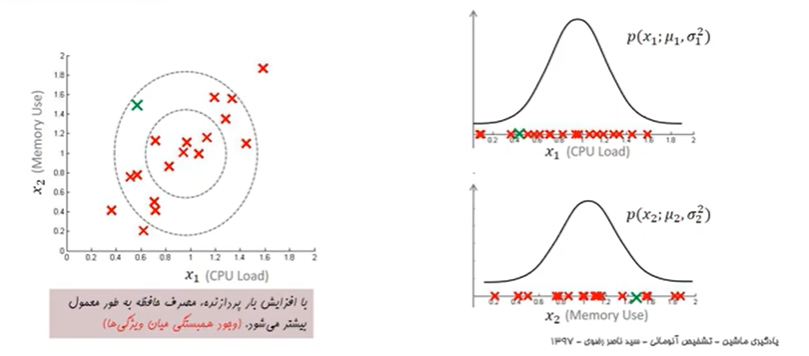

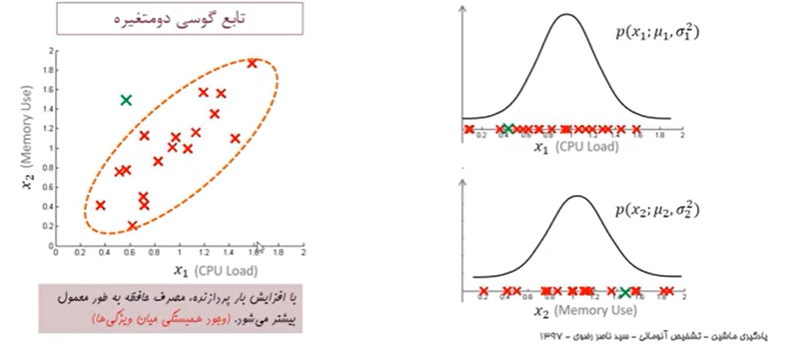

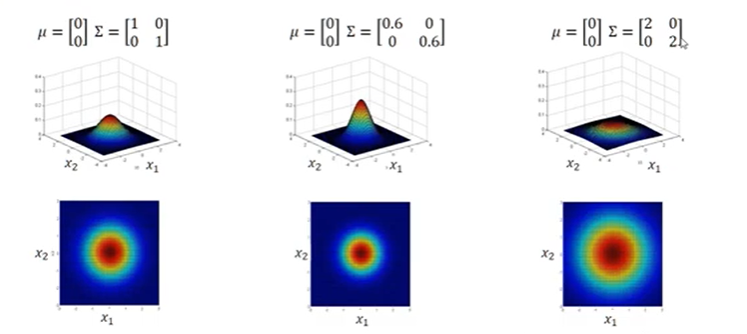

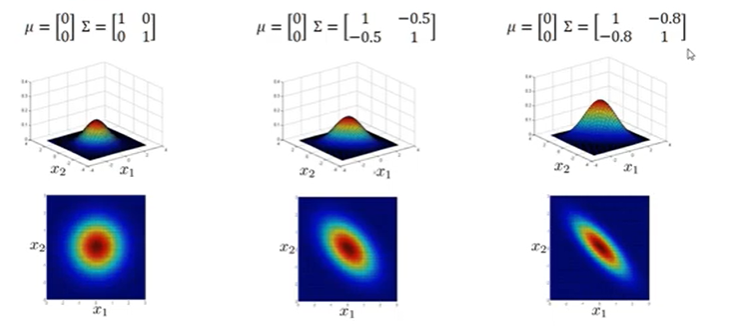

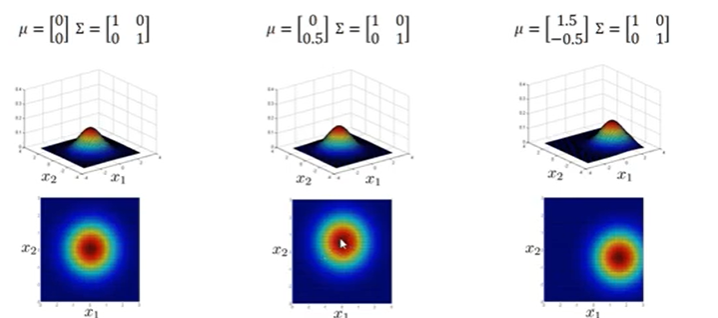